# Importando as bibliotecas necessárias

In [3]:
#TensorFlow + Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

#Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

# Importando a base de dados
Foi utilizada um dataset de peças de xadrez, que contém aproximadamente 550 imagens, esta base é divida em subpastas com o devido nome das classes(Bispo,Cavalo,Peao,Rainha,Rei,Torre) respectivamente. 

Disponível em: https://drive.google.com/drive/folders/1rgrVLOh7yE7-38uo7InyDS0HnL942T1Y?usp=sharing

In [4]:
#Importando o dataset e direcionando para o treinamento
train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Chessman-image-dataset/Xadrez',
#Parâmetros padrões para definir as configurações dos dados e direcionar em um conjunto de treinamento
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=(48, 48),
    batch_size=32,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [5]:
#Importando o dataset e direcionando para a validação
validation = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Chessman-image-dataset/Xadrez',
    #Parâmetros padrões para definir as configurações dos dados
    #(como o tamanho ou batch_size que é o tamanho do conjunto(número de amostras)) e
    #direcionar em um conjunto de treinamento
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=(48, 48),
    batch_size=32,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [ ]:
#Dataset disponível em: https://drive.google.com/drive/folders/1rgrVLOh7yE7-38uo7InyDS0HnL942T1Y?usp=sharing
#Está no drive, pois o tensor flow é conectado neste meio, é só montar a pasta do drive
#Ele reconhecerá todas as pastas, basta selecionar e usar '/content/drive/Mydrive/nome_dataset'

# Criando o modelo

Montando as camadas

In [6]:
#Montando as camadas
image_size = (48, 48)
#Definindo o tamanho do lote(dado) de treinamento, os tensores terão a mesma dimensão(3)
input_shape = (image_size[0], image_size[1], 3)
#Definindo o modelo para camadas simples(sequenciais)
model = keras.Sequential([
    #Cria um kernel de convolução que é convolvido com a entrada da camada para produzir um tensor de saídas
    #"Resumindo" as dimensões, definindo com espaço zero e informando as funções de ativação
    Conv2D(64, (3,3), input_shape=image_size + (3,), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    #Reduz a resolução
    MaxPooling2D(pool_size=(2,2)),
    #Achata a entrada(reformata os dados)
    Flatten(),
    #Conecta a camada e passa a função de ativação
    Dense(256, activation='relu'),
    #Define a fração das unidades de entrada(flutua entre 0-1) 
    Dropout(0.5),
    #Dimensionando a saída(espaço)
    Dense(6, activation='softmax')
])

In [15]:
#Classes das imagens
train.class_names

['Bispo', 'Cavalo', 'Peao', 'Rainha', 'Rei', 'Torre']

Compilando o modelo

In [7]:
#Compilando o modelo
model.compile(
    #Definindo como o modelo se atualiza mediante a função loss
    optimizer='adam',
    #Medição da precisão do modelo
    loss='categorical_crossentropy',
    #Monitoração dos dados de treinamento, a acc usa uma fração das imagens que foram previstas com êxito 
    metrics=['accuracy'])

 Treinando o modelo

In [8]:
#Alimentando com os dados, para que a IA possa aprender e associar cada imagem com sua respectiva classificação
model.fit(train,epochs=50,validation_data=validation)

Epoch 1/50
14/14 [==============================] - 189s 7s/step - loss: 237.5861 - accuracy: 0.1584 - val_loss: 2.0594 - val_accuracy: 0.2091
Epoch 2/50
14/14 [==============================] - 17s 1s/step - loss: 1.9090 - accuracy: 0.2398 - val_loss: 1.7978 - val_accuracy: 0.1818
Epoch 3/50
14/14 [==============================] - 17s 1s/step - loss: 1.5836 - accuracy: 0.3348 - val_loss: 1.8633 - val_accuracy: 0.2273
Epoch 4/50
14/14 [==============================] - 17s 1s/step - loss: 1.3664 - accuracy: 0.4412 - val_loss: 2.0526 - val_accuracy: 0.2273
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 1.1849 - accuracy: 0.5362 - val_loss: 2.3444 - val_accuracy: 0.2727
Epoch 6/50
14/14 [==============================] - 17s 1s/step - loss: 0.9868 - accuracy: 0.5882 - val_loss: 2.6916 - val_accuracy: 0.2636
Epoch 7/50
14/14 [==============================] - 17s 1s/step - loss: 0.7896 - accuracy: 0.6833 - val_loss: 2.9411 - val_accuracy: 0.2091
Epoch 8/50
14/14 

Avaliando o modelo

In [9]:
#Testando a accurácia, que retorna a perfomance do teste 
test_loss, test_acc = model.evaluate(train, verbose=2)
print('\nTest accuracy:', test_acc)

14/14 - 6s - loss: 0.0424 - accuracy: 0.9887

Test accuracy: 0.9886877536773682


Fazendo uma predição de uma imagem

In [12]:
#Fazendo uma predição de uma imagem qualquer
predictions = model.predict(train)
predictions[10]


array([1.0000000e+00, 2.7140792e-27, 9.6554466e-20, 3.8031630e-14,
       1.3500624e-17, 1.5313590e-14], dtype=float32)

In [13]:
#Pegando o array do resultado e convertendo em inteiro(número respectivo da classe indentificada) 
np.argmax(predictions[10])

0

In [14]:
#Apontando o resultado da predição com o, resultou em '0', as classes vão do 0 ao 6
train.class_names[0]

'Bispo'

# Resultados
Foi testado uma imagem de cada classe

['Bispo', 'Cavalo', 'Peao', 'Rainha', 'Rei', 'Torre']=[   0   ,    1    ,    2  ,     3   ,   4  ,    5   ]

Bispo

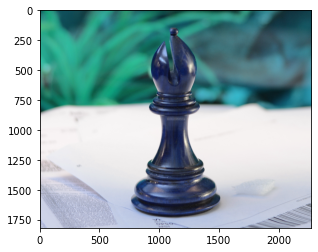

In [24]:
#Pegando uma imagem da base de dados e exibindo
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Bispo/00000012.jpg')
plt.imshow(objeto)

In [25]:
#Exibindo as dimensões da imagem
print(objeto.shape)

(1819, 2274, 3)


In [26]:
#Reduzindo a imagem para 48x48 antes de realizar o teste
objeto=cv2.resize(objeto, (48,48))

In [27]:
#Conferindo as dimensões e atribuindo para outra variável, por padronização
img=objeto
print(img.shape)

(48, 48, 3)


In [28]:
#O keras realiza predições em massa, muitos itens de uma vez, mesmo que uma imagem é necessário pôr ela numa lista
img = (np.expand_dims(img,0))

In [29]:
#Fazendo a predição da imagem
predictions_single = model.predict(img)

print(predictions_single)


[[9.9667740e-01 3.9651655e-09 8.2459702e-04 9.5761068e-05 2.4010406e-03
  1.1792142e-06]]


In [30]:
#Utilizando a função para converter o array num número inteiro, este que será o identificador da classe da imagem
#E ao invés de imprimir o número, será impresso a classe que a IA apontou
#Pegando o número e colocando como posição da lista de classes
#Se retornar 0 é o bispo, se 1 Cavalo...
print(train.class_names[np.argmax(predictions_single[0])])


Bispo


Cavalo

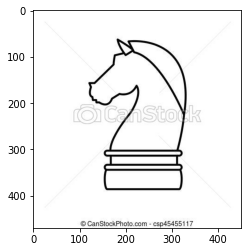

In [36]:
#Teste com o cavalo 
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Cavalo/00000097.jpg')
plt.imshow(objeto)

objeto=cv2.resize(objeto, (48,48))
img=objeto

img = (np.expand_dims(img,0))



In [37]:
predictions_single = model.predict(img)
print(predictions_single)

print(train.class_names[np.argmax(predictions_single[0])])

[[3.7402267e-28 1.0000000e+00 2.8161447e-32 1.3336948e-21 1.1327457e-24
  6.5952989e-36]]
Cavalo


Peão

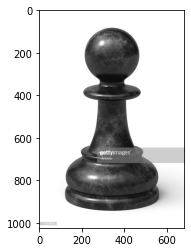

In [38]:
#Teste com o peão
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Peao/00000004.jpg')
plt.imshow(objeto)

objeto=cv2.resize(objeto, (48,48))
img=objeto

img = (np.expand_dims(img,0))

In [39]:
predictions_single = model.predict(img)
print(predictions_single)

print(train.class_names[np.argmax(predictions_single[0])])

[[1.2649301e-28 1.0934346e-25 1.0000000e+00 2.0395660e-17 6.1136903e-32
  3.7730671e-23]]
Peao


Rainha

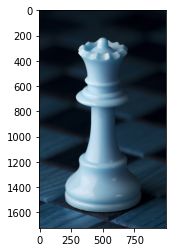

In [40]:
#Teste com a rainha
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Rainha/00000003.jpg')
plt.imshow(objeto)

objeto=cv2.resize(objeto, (48,48))
img=objeto

img = (np.expand_dims(img,0))

In [41]:
predictions_single = model.predict(img)
print(predictions_single)

print(train.class_names[np.argmax(predictions_single[0])])

[[1.6428129e-12 1.0504461e-12 6.3674907e-12 1.0000000e+00 1.5825424e-10
  5.6114835e-08]]
Rainha


Rei

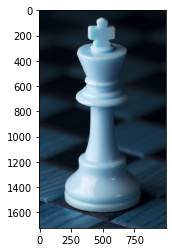

In [43]:
#Teste com o rei
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Rei/00000007.jpg')
plt.imshow(objeto)

objeto=cv2.resize(objeto, (48,48))
img=objeto

img = (np.expand_dims(img,0))


In [44]:
predictions_single = model.predict(img)
print(predictions_single)

print(train.class_names[np.argmax(predictions_single[0])])

[[5.8465295e-11 3.0694760e-09 5.8213483e-11 1.0095705e-12 1.0000000e+00
  3.2345091e-16]]
Rei


Torre

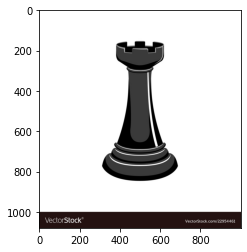

In [46]:
#Por último, teste com a torre 
objeto= cv2.imread('/content/drive/MyDrive/Chessman-image-dataset/Xadrez/Torre/00000006.jpg')
plt.imshow(objeto)

objeto=cv2.resize(objeto, (48,48))
img=objeto

img = (np.expand_dims(img,0))


In [47]:
predictions_single = model.predict(img)
print(predictions_single)

print(train.class_names[np.argmax(predictions_single[0])])

[[4.4254560e-18 6.7787437e-10 6.1557930e-06 1.3062663e-12 3.3015502e-20
  9.9999380e-01]]
Torre


In [ ]:
#By George Trindade